#Problema de la Propina - Hard
Al dar la propina se considera la calidad del servicio y la comida, calificándolos entre 0 y 10. Se utilizan los dos factores mencionados para dejar una propina de entre 0 a 25%.

**Reglas**:

- Si el servicio es bueno o la calidad de la comida es buena, entonces la propina sera alta. 
- Si el servicio es promedio, entonces, la propina será media. 
- Si el servicio es deficiente o la calidad de la comida es deficiente, entonces la propina será baja. 

## Instalación Librería Scikit-Fuzzy y carga de librerías al programa

In [1]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 8.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=ddf70386b6dd15fcca91bc4bed544713d223996dab3a852b72c88eae10fa6d51
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

## 1. Generar el universo de discurso para los antecedentes y consecuentes

## Declaración de los antecedentes y consecuentes con su universo de discurso.
 
Antecedentes (Entradas):

**Servicio**:

- Universo de Discurso: Que tan bueno es el servicio de los meseros en una escala **de 0 a 10**.

- Conjuntos Difusos: deficiente, aceptable, excelente. 

**Calidad de la Comida**:
- Universo de Discurso: Que tan sabrosa era la comida, en una escala  de **0 a 10**. 
-Conjunto Difuso: mala, decente, excelente. 

**Consecuencia (Salida)**:

- Propina:
Universo de Discurso: que porcentaje se debe dejar de propina, en una escala de 0% a 25%. 
- Conjuntos Difusos: Bajo, Medio, Alto. 

In [3]:
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

## 2. Crear funciones de membresia

In [5]:
# Generate fuzzy membership functions
#calidad de la comida
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])

# calidad del servicio
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])

#Propina
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

### Visualización de las funciones de membresia

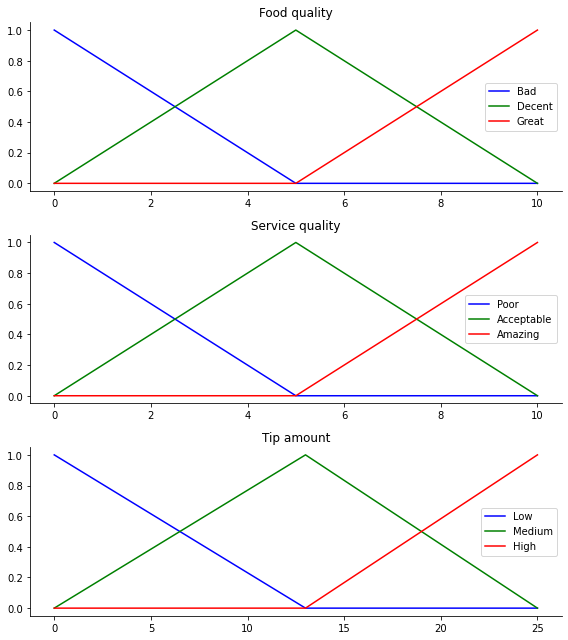

In [11]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

##3. Fuzificación

In [26]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
Comida = 8
Servicio = 3
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, Comida)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, Comida)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, Comida)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, Servicio)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, Servicio)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, Servicio)

##4. Aplicación de las reglas

**Reglas**:

- Si el servicio es deficiente o la calidad de la comida es deficiente, entonces la propina será baja. 
- Si el servicio es promedio, entonces, la propina será media. 
- Si el servicio es bueno o la calidad de la comida es buena, entonces la propina sera alta. 

In [27]:
# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

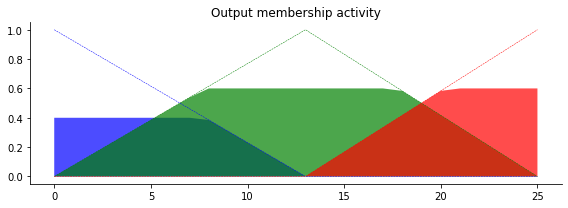

In [28]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## 5. Agregación de resultados de cada regla

In [33]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot
print("Propina: " + str(round(tip,2)))

Propina: 13.32


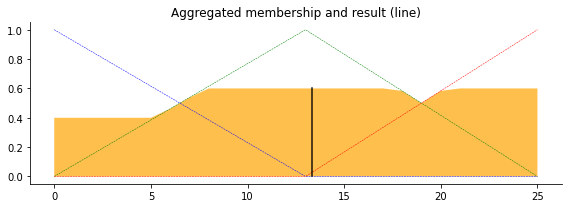

In [34]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()